In [1]:
from newsapi import NewsApiClient
import nltk
from nltk.corpus import stopwords
import tweepy
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [2]:
apikey = '1f410fa242c14f4f84d4947dd8fd3892'
consumer_key = 'g0sjhA8K1nLxmi10wfRnySWAD'
consumer_secret = 'Yzv0W30mMq2vkiee2uwTHecKbrPnttrsQSKqJDbG0d0qLfEEaH'
access_token = '979817021226536962-tg7SqgMBjriHmifGOpBWj7FBYayxDTX'
access_token_secret = 'dRy45oE1gVkMaNY7ITrYpDtdfkSqGDvNcHbtbXrs9Qg18'

In [3]:
client = NewsApiClient(api_key = apikey)

In [13]:
headlines = client.get_top_headlines(language = 'en', country = 'us')

In [14]:
titles = []
for article in headlines['articles']:
    temp_title = article['title'].encode('ascii', 'ignore')
    print temp_title
    titles.append(temp_title)

Two Black Men Were Arrested In Starbucks. Witnesses Say They "Didn't Do Anything."
A Trump Doctrine for the Middle East
Carrie Underwood shares another distant photo of face ahead of ACM Awards
Colorado police arrest woman found in dumpster for filing false report
Thousands of Hungarians Protest Against Newly Elected Leader
Prosecutors: Cohen raid is red flag for Trump
South African liberation fighter Winnie Madikizela-Mandela laid to rest with songs, tears and cheers
Kentucky governor claims that children were raped, used drugs while teachers protested
March for Science 2018: Passionate advocates push the cause for research across the globe
White Homeowner Almost Kills Black Teen Who Knocked On His Door To Ask For Directions
Who's to blame for the late Dez Bryant release?
Kylie Jenner Isn't Like Other Moms At Coachella, She's A Cool Mom
Cold, freezing rain, and thunderstorms are forecast for Marathon weekend
Turkey's Erdogan welcomes Western attack on Syria, says operation a message t

In [6]:
stop = stopwords.words('english')

In [11]:
keyname = []
for text in titles:    
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label() == 'PERSON' or chunk.label() == 'ORGANIZATION':
                    keyname.append(' '.join(c[0] for c in chunk.leaves()))
print keyname

['Shulkin', 'Tony', 'Ferguson', 'Max Holloway', 'Khabib Nurmagomedov', 'Bay', 'Saks', 'Lord', 'Taylor', 'Michigan', 'NCAA', 'Kim Jong Un', 'Trump International Golf Club', 'Pruitt', 'House', 'Tariffs', 'Efran', 'Ros Montt', 'Guatemalan Dictator Convicted', 'Space Lab', 'Bernie', 'Sanders', 'Trump', 'Amazon', 'Warriors', 'Patrick McCaw Sound', 'Player One', 'Stephon Clark', 'Laura', 'Ingraham']


In [15]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [18]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
title = titles[5]
extractor = twitter_setup()
tweets = extractor.search(q = title, lang = 'en')

15


In [21]:
sentiment_count = [0] * 3
for i in range(len(tweets)):
    tweet = tweets[i].text
    sentiment = analize_sentiment(tweet)
    sentiment_count[sentiment] += 1

North Korea's Kim Jong Un, wife, watch South Korean K-pop stars perform in Pyongyang


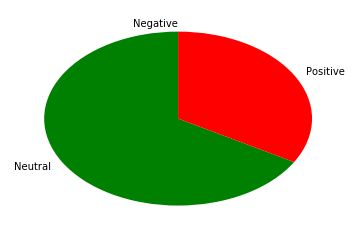

In [27]:
print title
sentiment_set = ['Neutral', 'Positive', 'Negative']
cols = ['g', 'r', 'b']

plt.pie(sentiment_count, labels = sentiment_set, colors = cols, startangle = 90)
plt.show()